In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_excel(io='./Обсчет_Гистографт.xlsx', sheet_name='common')
df

,first_point,second_point,third_point,fourth_point,fifth_point
0,152800.0,10350.0,452700.0,22450.0,842200.0
1,6806.0,2261.0,936.9,309.4,3965.0
2,9163.0,316200.0,19650.0,80270.0,2503.0
3,1580.0,25180.0,19710.0,5496.0,16200.0
4,358600.0,701800.0,90680.0,87120.0,180000.0
5,23350.0,15320.0,94230.0,272800.0,13160.0
6,2760.0,56210.0,821900.0,706900.0,1559000.0
7,7825.0,2687.0,61650.0,112700.0,264000.0


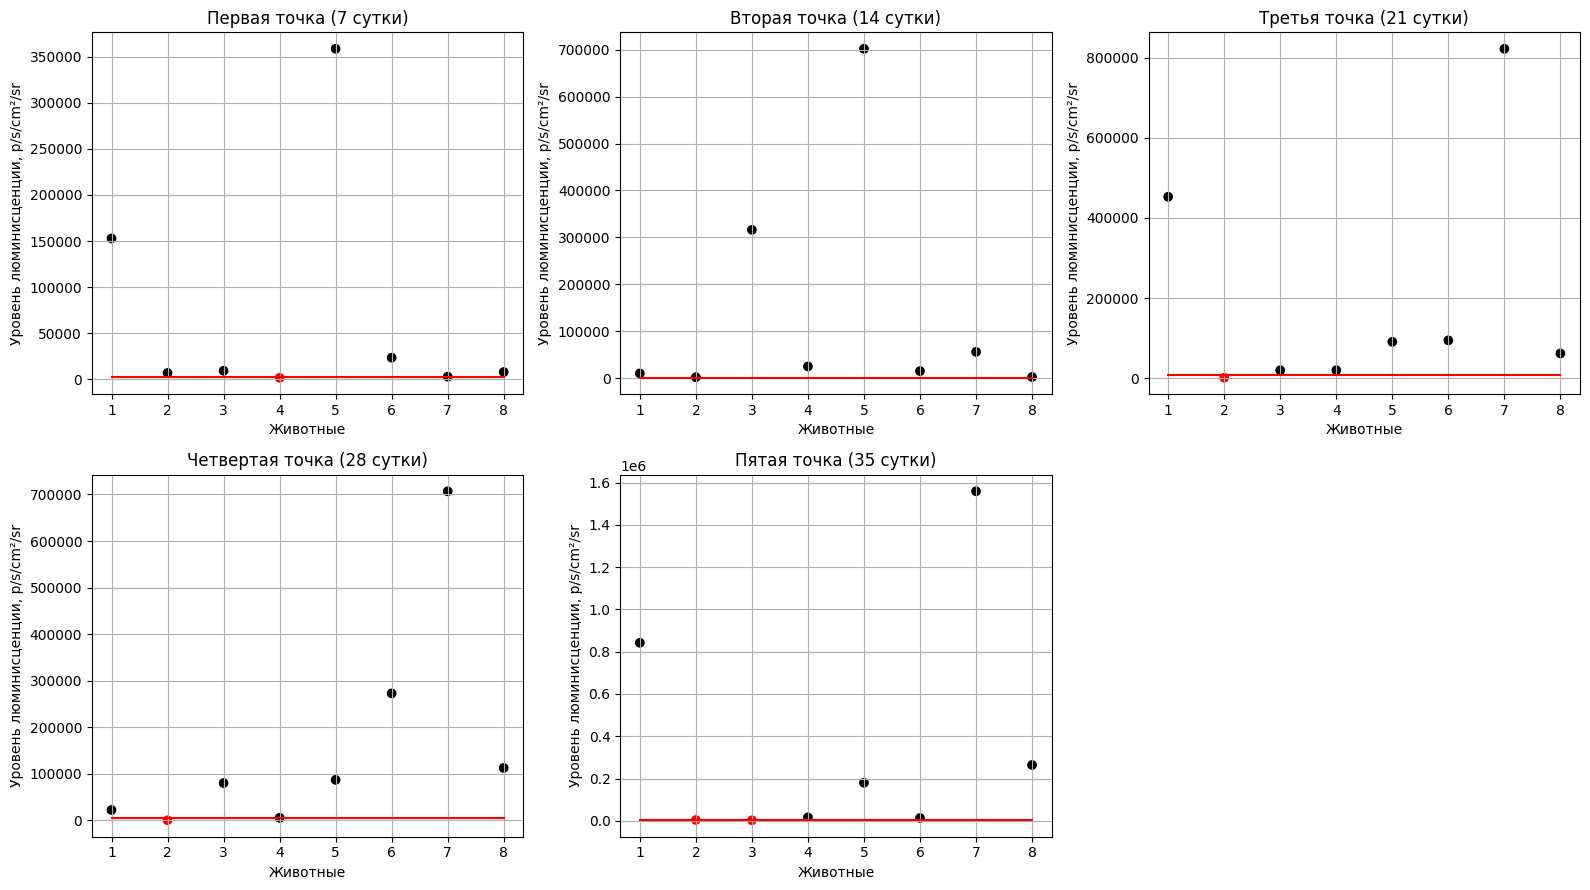

In [13]:
fig, axes = plt.subplots( 
    nrows=2, ncols=3, 
    figsize=(16, 9), tight_layout=True) 
axes[1,2].set_axis_off()

control = np.array([np.mean([3.203e+03,1.025e+03]), np.mean([9.16e+02, 1.267e+03]), np.mean([6.48e+02, 1.330e+04]), np.mean([3.383e+03, 5.308e+03]), np.mean([3.719e+03, 8.127e+03])])
titles = ['Первая точка (7 сутки)', 'Вторая точка (14 сутки)', 'Третья точка (21 сутки)', 'Четвертая точка (28 сутки)', 'Пятая точка (35 сутки)']

def color(data, average, column):
    col = []  # Создаем пустой список для цветов
    for value in data.iloc[:, column]:  # Проходим по значениям в столбце
        if value <= average:
            col.append('r')  # Добавляем красный цвет, если значение меньше среднего
        else:
            col.append('k')  # Иначе добавляем черный цвет
    return col  # Возвращаем список цветов


for i, ax in enumerate(axes.flatten()):
    if i < len(df.columns):
        ax.scatter(x = df.index, y = df.iloc[:, i], c=color(df, control[i], i))
        ax.set_title(f'{titles[i]}')
        ax.set_xticks(np.arange(8), ['1','2','3','4','5','6','7','8'])
        ax.set_xlabel('Животные')
        ax.set_ylabel('Уровень люминисценции, p/s/cm²/sr')
        ax.grid(mec='red')
        ax.plot(df.index, [control[i]] * len(df.index), 'r')
